# Assignment 3 - Working with data

**Rationale**. In this assignment, you will practice reading/writing common dataset formats, execute conditional subsetting of data, merge data, and perform groupby summaries.

Please comment your code for potential partial credit and to explain to me that you understand what you are doing. As always, feel free to add additional cells.

For any questions that requires a **text answer: make sure to type your answers in a text cell.**

(Make sure you've ) Save(d) the [datasets](https://drive.google.com/drive/folders/1qUKUkO3_v1KCYIqnIP7Aiw2Q_NUhtEdD?usp=sharing) in this folder to your Google Drive.

1. [Quebec Yelp Reviews](https://drive.google.com/file/d/1vnw9Muxf6rsUC0VeqNflXkjQ1DXnjvRX/view?usp=drive_link)
1.  [Quebec Business Info](https://drive.google.com/file/d/1x67CEff5OcaL3ONahYVeq1xNyDXDPTEn/view?usp=sharing)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# first, mount your GDrive
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


# Problem 1 (4 points)

Read in the Quebec Yelp dataset from your Google Drive. Make sure that there are no "Unnamed" columns - if so, you've read in the index_col as a regular column. Make sure that the index corresponds to the row of the dataset using the `.reset_index` method. Convert "Date" column to a Pandas datetime format.

1. What is the observational unit of this dataset? (What does each row represent?)
1. How many rows are in this dataset? columns?
1. When was the earliest review written? latest?

## Problem 1 Answers (edit this cell)

1. Each row represents one **review**.
1. There are **208166** rows in the dataset
    1. There are **22** columns in the dataset excluding the index.
1. The first review is written on **2007-01-02 00:00:00**.
    1. The last review is written on **2019-12-13 00:00:00**.

In [ ]:
import pandas as pd

# Reading the Feedback File
reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/quebec_yelp_reviews.csv')

# Reset the index if necessary and look at the first rows to check for "Unnamed" columns
reviews_df.reset_index(drop=True, inplace=True)

# Checking the first few rows to become familiar with the data structure
reviews_df.head()



,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,...,state,postal_code,latitude,longitude,stars_biz,review_count,is_open,attributes,categories,hours
0,0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,5,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,4,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,3,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
4,4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,2,0,1,1,The bagels are good but first they had me writ...,2015-05-26,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


In [ ]:
# Removing the column "Unnamed: 0"
reviews_df.drop(columns=['Unnamed: 0'], inplace=True)

# Convert the "date" column to datetime format
reviews_df['date'] = pd.to_datetime(reviews_df['date'])

# Checking the conversion results
reviews_df.dtypes['date'], reviews_df.head()


(dtype('<M8[ns]'),
                 review_id                 user_id             business_id  \
 0  sybVjriZuCEH09zplkcXAw  qkJtn0Rtz_lKlTs5azBkng  tOhRQqiupLyJdBJVQMGOEQ   
 1  uZ66BJLPMx6mJAY_6bi8vQ  kNL4SpfIdMC8GywGayDEOw  tOhRQqiupLyJdBJVQMGOEQ   
 2  uRPUL-YSYuaJZLQp3Z0QlA  dSeYpzf0JkCeARr_CyCh7A  tOhRQqiupLyJdBJVQMGOEQ   
 3  AGxEC3EtPW1vZH3v2DnPFA  ZhK2xIa4f73JZfua7IP8vA  tOhRQqiupLyJdBJVQMGOEQ   
 4  7rBHa16cZexmPopeVrGKBw  ClJirlfCI0W0CfpYaWdfEw  tOhRQqiupLyJdBJVQMGOEQ   
 
    stars  useful  funny  cool  \
 0      5       0      0     0   
 1      4       0      0     0   
 2      1       1      2     0   
 3      3       0      0     1   
 4      2       0      1     1   
 
                                                 text       date  \
 0  AMAZING. Simply amazing. Believe all of the hy... 2013-12-29   
 1  Montreal bagels were well worth the experience... 2016-07-14   
 2  Montreal, what did you do in a previous life t... 2012-06-26   
 3  St-Viateur is better, as bage

In [ ]:
# Number of rows and columns
rows, cols = reviews_df.shape

# Earliest and latest date of reviews
earliest_review = reviews_df['date'].min()
latest_review = reviews_df['date'].max()

rows, cols, earliest_review, latest_review





(208166,
 22,
 Timestamp('2007-01-02 00:00:00'),
 Timestamp('2019-12-13 00:00:00'))

# Problem 2 (4 points)

Construct a **new** dataframe by selecting only the reviews written 1) on or after May 1st 2016 **and** 2) before June 1st 2019. **Save it** to an appropriate location on your Google Drive. (feel free to delete it later)

In [ ]:
# Filter reviews by date
filtered_reviews_df = reviews_df[(reviews_df['date'] >= '2016-05-01') & (reviews_df['date'] < '2019-06-01')]

# Check the minimum and maximum dates in the filtered data set
min_date_filtered = filtered_reviews_df['date'].min()
max_date_filtered = filtered_reviews_df['date'].max()

min_date_filtered, max_date_filtered





(Timestamp('2016-05-01 00:00:00'), Timestamp('2019-05-31 00:00:00'))

In [ ]:
# Save the filtered dataset to a CSV file
filtered_reviews_df.to_csv('/content/drive/MyDrive/Colab Notebooks/filtered_quebec_yelp_reviews.csv', index=False)

# Return the path to the saved file for the user
'/content/drive/MyDrive/Colab Notebooks/filtered_quebec_yelp_reviews.csv'


'/content/drive/MyDrive/Colab Notebooks/filtered_quebec_yelp_reviews.csv'

# Problem 3 (4 points)

**Use the dataset created in problem 2**

Create a new column `ym` that represents the year and month (drops date and time from dates).\
*Hint use `.dt.to_period` method from [notes](https://colab.research.google.com/drive/10l8yNqCnsX7dSudcnA66mEENpGVYtjR9?usp=sharing).

Next, construct a line plot of the average usefulness votes (y-axis) by month between 2016/5 and 2019/5 `ym` (x-axis).\
*Hint - you need to do a groupby plot grouping on `ym` and compute the mean of usefulness.

### Use a text cell to answer:
1. What seasonal patterns do you see in the average usefulness votes per review in Quebec?
1. Come up with 2 potential explanations for the pattern(s) you've noticed.

## Problem 3 Answer (edit this cell)
1. (We can observe some fluctuations in the average values of "useful" votes by month, although there is no obvious seasonal pattern. However, there are small peaks and declines that may indicate minor changes in the perception of the usefulness of users' feedback in different months.)
1. (Increased activity of travelers: Perhaps in certain months (for example, in summer or during holiday periods) the number of travelers and tourists in Quebec increases, which may lead to more reviews and, as a result, to changes in the average values of "useful" votes.
Changing consumption patterns: At different times of the year, people can look for different types of establishments (for example, warmer places in winter or vice versa, cool in summer), which can also affect the number and usefulness of reviews depending on the season.)

In [ ]:
# Create a 'ym' column representing the year and month
filtered_reviews_df['ym'] = filtered_reviews_df['date'].dt.to_period('M')

# Check for unique values ​​in column 'ym'
unique_ym = filtered_reviews_df['ym'].unique()

unique_ym





<ipython-input-38-651d06e6c265>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews_df['ym'] = filtered_reviews_df['date'].dt.to_period('M')


<PeriodArray>
['2016-07', '2016-09', '2018-09', '2017-05', '2017-06', '2017-07', '2016-05',
 '2018-08', '2017-08', '2017-10', '2016-10', '2018-07', '2016-08', '2016-06',
 '2017-04', '2017-01', '2018-06', '2018-02', '2018-05', '2017-09', '2018-04',
 '2018-03', '2016-12', '2016-11', '2017-02', '2017-11', '2017-03', '2018-01',
 '2018-10', '2017-12', '2019-01', '2018-12', '2018-11', '2019-04', '2019-03',
 '2019-02', '2019-05']
Length: 37, dtype: period[M]

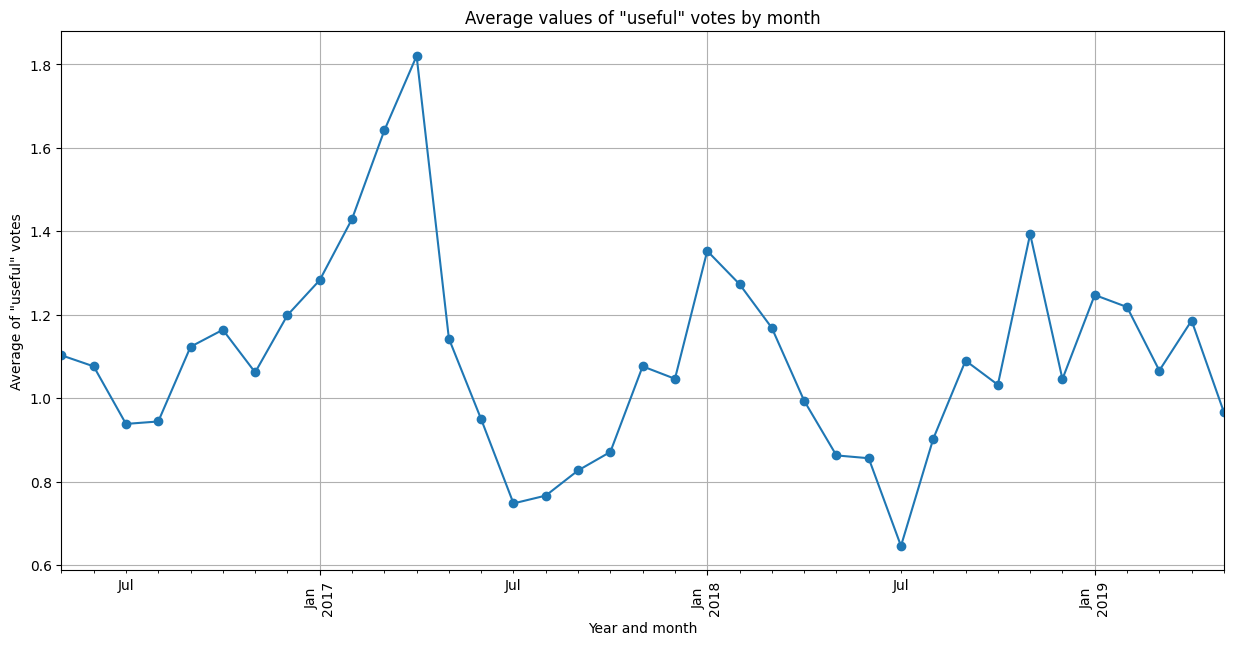

In [ ]:
import matplotlib.pyplot as plt

# Group data by 'ym' and calculate average 'useful'
avg_useful_by_ym = filtered_reviews_df.groupby('ym')['useful'].mean()

# Graphing
plt.figure(figsize=(15, 7))
avg_useful_by_ym.plot(kind='line', marker='o')
plt.title('Average values ​​of "useful" votes by month')
plt.xlabel('Year and month')
plt.ylabel('Average of "useful" votes')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


# Probelm 4 (8 points)

Read in the Quebec **business info** dataset, be sure to use a different variable name for this dataframe.

## Part A questions (4 pts)
1. What is the observational unit of this dataset?
1. On what variable should you merge this (right dataframe) **into** the review data (left dataframe)?

**Merge business data into the dataframe from Q2.**

Notice a column called "is_open" - if a business has shut down, this column will have a value of 0, otherwise it will have a value of 1.

Construct the line plot where:
* x-axis is `ym`
* y-axis is average star rating
* there are 2 lines: 1. for currently open businesses and 2. closed businesses
    * Make sure the 2 lines appear on the same figure.
    * You should compute avg. star rating using the `star` variable, not the `biz_star` variable.

## Part B questions (4 pts)
1. Any difference in patterns between these 2 groups of businesses?
1. Speculate on what reason(s) might cause the observed pattern(s).



## Problem 4 Answers (Edit this cell)

### Part A

1. Each row represents one **business**
1. We should merge on **business_id**

### Part B

1. (The graph shows that the average star rating for open businesses is usually higher than for closed ones. This may indicate that the quality of services or goods offered by businesses that continue to operate is better than those that have closed.)
1. 2 possible reasons are:
    1. (Quality of service and customer satisfaction: Open businesses may be better adapted to the needs of customers and offer better products or services, which leads to higher ratings and, as a result, to their ongoing activities.)
    1. (Economic sustainability and management: Businesses that can maintain stable and effective management, including marketing, resource management and customer service, are more likely to remain open and successful, reflected in their ratings.)

In [ ]:
# Reading business information file
biz_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/quebec_biz.csv')

# Look at the first few rows to familiarize yourself with the data structure
biz_df.head()




,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
0,2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
1,31,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
2,43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
3,45,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
4,57,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [ ]:
# Removing the "Unnamed: 0" column from the business dataframe
biz_df.drop(columns=['Unnamed: 0'], inplace=True)

# Combining dataframes of reviews (from task 2) and business by 'business_id'
merged_df = filtered_reviews_df.merge(biz_df, on='business_id', suffixes=('_review', '_biz'))

# Checking merge results, especially columns and rows
merged_df.head()





,review_id,user_id,business_id,stars,useful,funny,cool,text,date,name_review,...,state_biz,postal_code_biz,latitude_biz,longitude_biz,biz_stars,review_count_biz,is_open_biz,attributes_biz,categories_biz,hours_biz
0,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,4,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,Fairmount Bagel,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
1,Sc0YoR19v2ZHqPjjReMdfQ,8VFNDokKKbpUgCrH6TF9fA,tOhRQqiupLyJdBJVQMGOEQ,4,0,0,0,Cheap and delicous! I definently understand wh...,2016-09-19,Fairmount Bagel,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
2,uZnzhtYAXAO_4ICeWOq9_A,bemY1DWj0rOLIPUBRnfkjg,tOhRQqiupLyJdBJVQMGOEQ,5,0,0,0,Coming from a NYCer... This place is an absolu...,2018-09-03,Fairmount Bagel,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
3,Vx19GFjr7lSltZGOvBY6-A,0_7UeN4U_D6Iw6tHm90tXg,tOhRQqiupLyJdBJVQMGOEQ,4,1,2,0,Great bagel if purchased straight from the ove...,2017-05-26,Fairmount Bagel,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
4,bXJ2bQ815xuUTLgo2UXpww,YVaONBBT9lSJQwBPWCB0qQ,tOhRQqiupLyJdBJVQMGOEQ,4,3,2,1,Location: Let me think.... oh yes - on Fairmou...,2017-06-17,Fairmount Bagel,...,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."


<Figure size 1500x700 with 0 Axes>

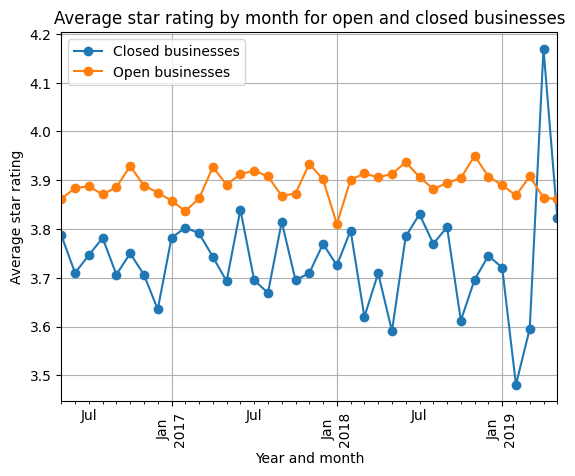

In [ ]:
# Group by 'ym' and 'is_open_biz' and calculate the average of stars
avg_stars_by_ym_openness = merged_df.groupby(['ym', 'is_open_biz'])['stars'].mean().unstack()

# Graphing
plt.figure(figsize=(15, 7))
avg_stars_by_ym_openness.plot(kind='line', marker='o')
plt.title('Average star rating by month for open and closed businesses')
plt.xlabel('Year and month')
plt.ylabel('Average star rating')
plt.legend(['Closed businesses', 'Open businesses'])
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
